In [2]:
##8.3 PCA ##
#https://www.youtube.com/watch?v=FgakZw6K1QQ
#https://angeloyeo.github.io/2019/07/27/PCA.html
import numpy as np

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

print('X.shape:', X.shape)

X.shape: (60, 3)


In [3]:
import pandas as pd

df = pd.DataFrame(X, columns=['$X_1$', '$X_2$', '$X_3$'])
df.head(10)

,$X_1$,$X_2$,$X_3$
0,-1.015700,-0.550913,-0.261326
1,-0.007717,0.599586,0.035078
2,-0.953171,-0.464537,-0.249203
3,-0.920123,0.210096,0.021824
4,-0.763097,0.158261,0.191525
5,1.118161,0.325087,0.317106
6,-1.022589,-0.643841,-0.133687
7,0.673520,-0.273425,-0.007878
8,1.016196,0.515466,0.467833
9,0.549577,0.677280,0.234016


In [5]:
## 8.3.2 SVD ##

X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [6]:
## 8.3.3 d차원으로 투영 ##
W2 = Vt.T[:, :2] #첫 2개의 주성분을 담은 행렬
X2D = X_centered.dot(W2) #d차원으로 투영

In [7]:
## 8.3.4 사이킷런 PCA ##
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #2차원으로 축소
X2D = pca.fit_transform(X)

In [8]:
pca.explained_variance_ratio_ #설명된 분산의 비율, 각 축이 차지하는 분산의 비율 저장

array([0.84248607, 0.14631839])

In [11]:
## 8.3.6 적절한 차원 수 선택하기 ##
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_) #분산의 누적합 구하기
d = np.argmax(cumsum >= 0.95) + 1 #전제 비율이 95%가 되는 인덱스

print(f"{d}차원이 가장 적합")

2차원이 가장 적합


[0.84248607 0.98880446 1.        ]


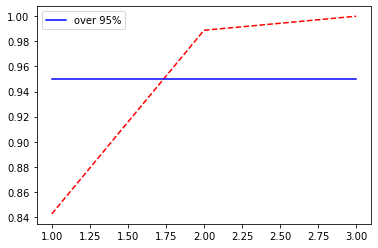

In [29]:
from matplotlib import pyplot as plt

print(cumsum)
plt.plot([1,2,3], cumsum, "r--")
plt.plot([1,3], [0.95, 0.95], "b", label="over 95%")
plt.legend()
plt.show()

In [14]:
pca = PCA(n_components=0.95) #분산의 비율이 0.95가 되도록 축소
X_reduced = pca.fit_transform(X)
print(X_reduced.shape) #2차원으로 축소됨

(60, 2)


In [33]:
## 8.3.7 압축을 위한 PCA ##
from tensorflow.keras.datasets import mnist

# MNIST load
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [35]:
# reshape
train_x = train_x.reshape(-1, 28*28) 

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(train_x)  # PCA 계산 후 투영

pca.n_components_ #154처원으로 축소

154

In [37]:
X_recovered = pca.inverse_transform(X_reduced)

X_recovered.shape #784차원으로 복구

(60000, 784)

In [40]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

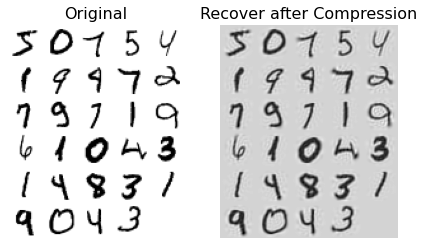

In [45]:
import matplotlib

plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(train_x[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Recover after Compression", fontsize=16)
plot_digits(X_recovered[::2100])

In [47]:
## 8.3.8 점진적 PCA ##
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)

for X_batch in np.array_split(train_x, n_batches): #100번에 나눠서 차원축소
    inc_pca.partial_fit(X_batch)
    
X_reduced = inc_pca.transform(train_x)

In [48]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced) #축소된 차원 복구

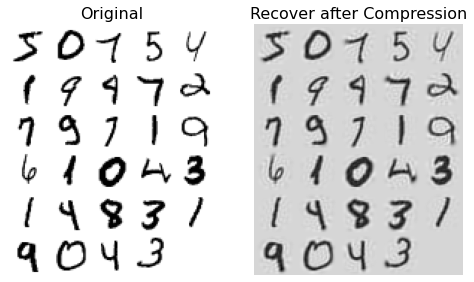

In [51]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plt.title("Original", fontsize=16)
plot_digits(train_x[::2100])
plt.subplot(122)
plt.title("Recover after Compression", fontsize=16)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

In [53]:
## 8.3.9 랜덤 PCA ##
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(train_x)

X_reduced.shape

(60000, 154)

In [61]:
## 8.4 커널 PCA ##
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42) #스위스롤 데이터 만들기
y = t > 6.9

In [62]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

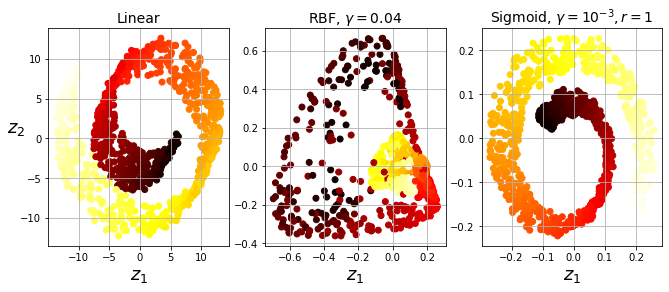

In [63]:
lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True) #선형커널
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True) #RBF커널
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True) #시그모이드 커널

y = t > 6.9 #샘플의 단변량이 6.9이상

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear"), (132, rbf_pca, "RBF, $\gamma=0.04$"), (133, sig_pca, "Sigmoid, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

In [68]:
## 8.4.1 커널 선택과 하이퍼파타미터 튜닝 ##
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression())
])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

grid_search.best_params_ #최적의 하이퍼파라메터

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}

In [69]:
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.433,
                   fit_inverse_transform=True) #투영된 샘플을 훈련세트로, 원본샘플을 타겟으로 하는 지도 학습 회귀 모델 훈련
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [70]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage) #재구성 원상오차
#재구성 원상오차가 최소화 되도록 훈련하기

41.677105867102135

In [76]:
## 8.5 LLE ##
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [77]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
lle.fit(X)

LocallyLinearEmbedding(eigen_solver='auto', hessian_tol=0.0001, max_iter=100,
            method='standard', modified_tol=1e-12, n_components=2,
            n_jobs=1, n_neighbors=10, neighbors_algorithm='auto',
            random_state=42, reg=0.001, tol=1e-06)

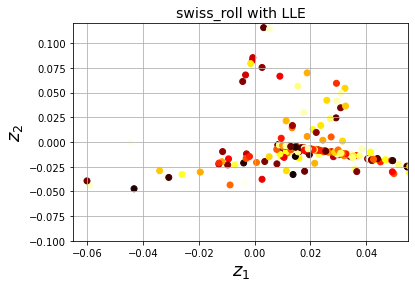

In [80]:
plt.title("swiss_roll with LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.show()